<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Clustering</h1>

## 1. Aims
<div class="alert alert-info"> 
To implement $k$-means and use it to cluster some data.
</div>

In [1]:
import numpy as np

X = np.loadtxt("kmeansdata.txt", dtype='f', delimiter=' ')

In [2]:
print(X.shape)

(100, 2)


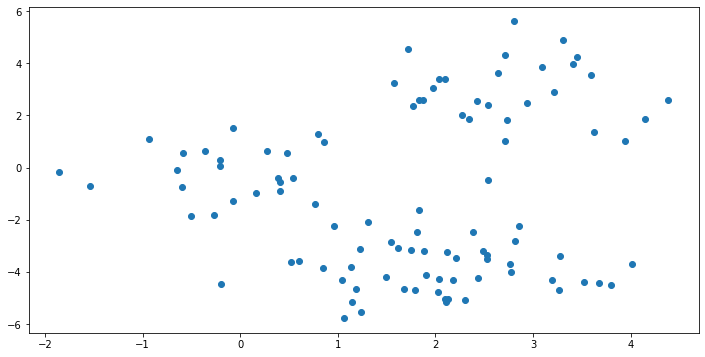

In [3]:
import matplotlib.pyplot as plt

# visualize data
plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## 2. Implement the $k$-means algorithm covered in the lecture (not the kernelised version)

<div class="alert alert-info">

Hints:
<br>
<ul> 
<li> Your code needs to alternate between assigning points to the cluster that they’re closest to and recalculating the means by taking the average of these points.
<li> You may need to add something to your code to deal with the problem of no points being assigned to a particular cluster – set the mean randomly.
<li> You’ll find it easiest to maintain a variable that indicates which cluster each point is assigned to. Be careful not to assign a point to more than one cluster.
<li> Your algorithm should converge in fewer than 20 steps (or thereabouts). If it takes 100, something isn’t right!
</ul>

</div>

In [4]:
import sys

# helper functions
def assign_to_cluster(data_point, centroids):
  min_dist = sys.maxsize
  best_id = -1
  for i, curr_mean in enumerate(centroids):
    curr_dist = (data_point - curr_mean).T @ (data_point - curr_mean)
    if curr_dist < min_dist:
      min_dist = curr_dist
      best_id = i
  return best_id

def assign_points(X, centroids, Z):
  for i, x in enumerate(X):
    id_cluster = assign_to_cluster(x, centroids)
    Z[i, :] = 0
    Z[i, id_cluster] = 1
  return Z

def update_means(Z, X, centroids):
  updated_centroids = centroids.copy()
  for k, mean_k in enumerate(centroids):
    numerat = np.sum(np.array([x_n for i, x_n in enumerate(X) if Z[i,k] == 1]), axis=0)
    denom = np.sum(Z[:, k])
    # if no points assigned to a cluster I update centroid randomly
    if denom == 0:
      updated_centroids[k] = np.random.rand(X.shape[1],)
    else:
      updated_centroids[k] = numerat / denom
  return updated_centroids

def get_cluster_per_sample(Z):
  clusters = []
  for z in Z:
    for i, val in enumerate(z):
      if val == 1:
        break
    clusters.append(i)
  return np.array(clusters)

def plot_curr_result(X, centroids, iteration, Z):
  clusters = get_cluster_per_sample(Z)
  plt.scatter(X[:, 0], X[:, 1], s=10, c=clusters)
  plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='red')
  plt.title(f'Clustering after {iteration} iterations')
  plt.show()

In [5]:
def kmeans(data, k=2, centroids=None):
  # define matrix Z
  curr_Z = np.zeros((len(X), k))
  # define vector of means
  centroids = np.random.randn(k, X.shape[1])
  # assign each data point to the closest cluster
  curr_Z = assign_points(data, centroids, curr_Z)
  # update means
  prev_Z = curr_Z.copy()
  centroids = update_means(curr_Z, data, centroids)
  curr_Z = assign_points(data, centroids, curr_Z)
  iteration = 0
  plot_curr_result(data, centroids, iteration, curr_Z)
  # check if assignments didn't change
  while False in (prev_Z == curr_Z):
    prev_Z = curr_Z.copy()
    centroids = update_means(curr_Z, data, centroids)
    curr_Z = assign_points(data, centroids, curr_Z)
    iteration += 1
    plot_curr_result(data, centroids, iteration, curr_Z)

## 3. Run your algorithm for $k$ = 2, 3, 4 and 5. 

<div class="alert alert-info">
In each case, plot the data using a different symbol for each cluster.
</fiv>

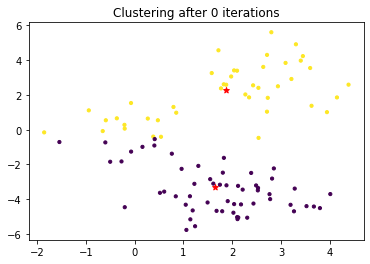

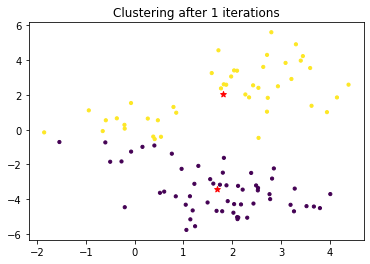

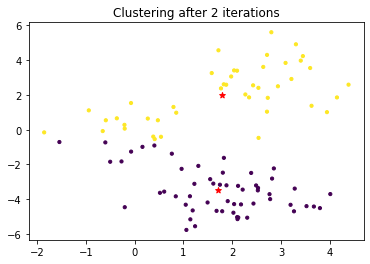

In [6]:
kmeans(X, k=2)

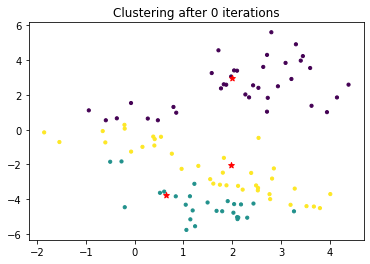

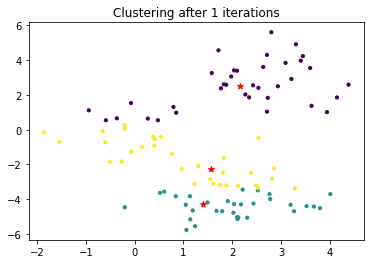

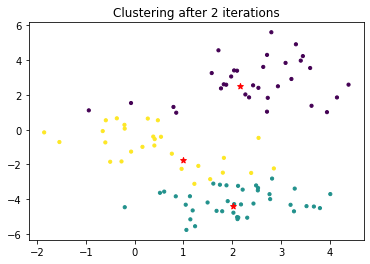

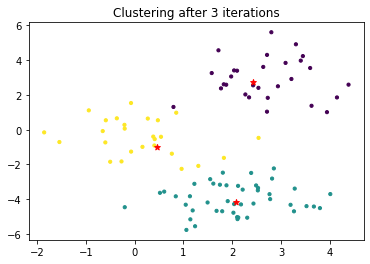

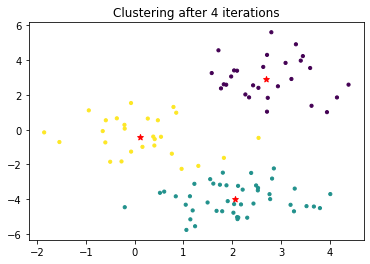

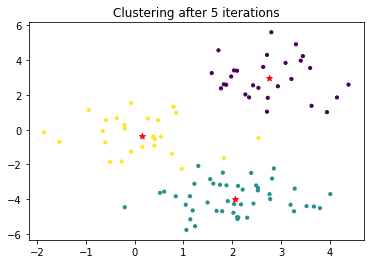

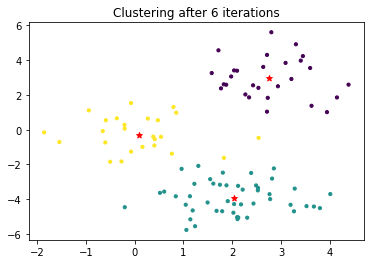

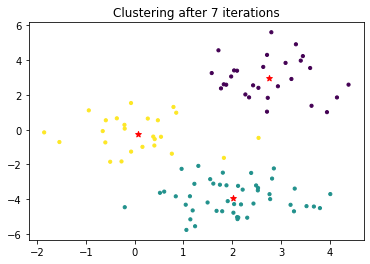

In [7]:
kmeans(X, k=3)

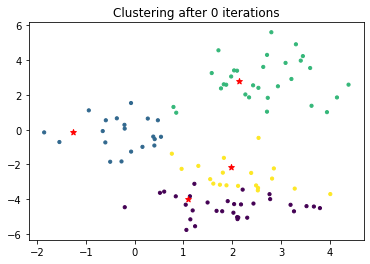

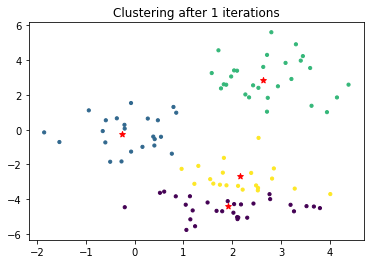

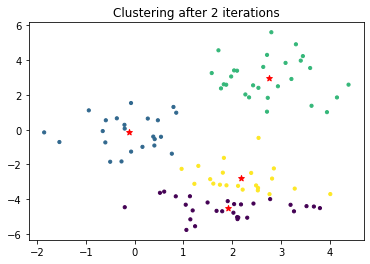

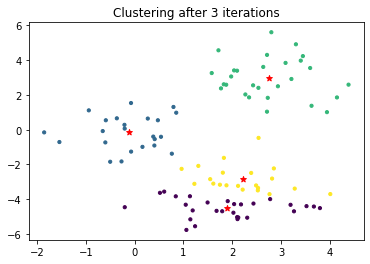

In [8]:
kmeans(X, k=4)

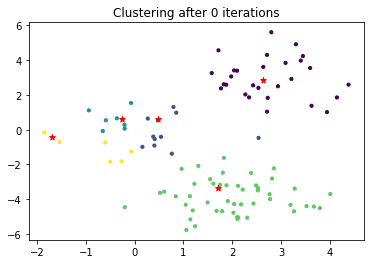

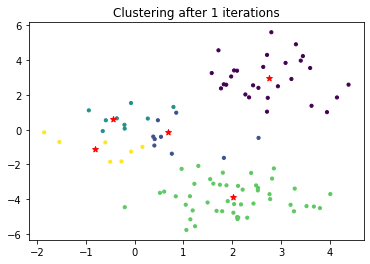

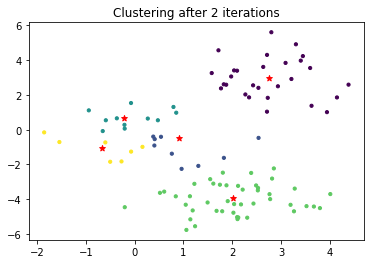

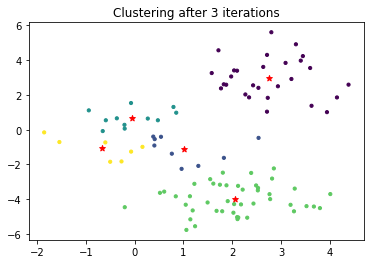

In [9]:
kmeans(X, k=5)